In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Major Project/Exoplanets/Data/LR_Data.csv')
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:,-1: ].values
X

array([[ 1.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.95000e+01, -1.66500e+01],
       [ 9.69000e-01,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         3.55000e+01, -1.62000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.71000e+02, -1.04900e+01],
       ...,
       [ 2.10000e-02,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.47000e+01, -1.83694e+03],
       [ 9.20000e-02,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         5.27000e+01, -1.09500e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  1.00000e+00,
         1.08000e+01, -1.94330e+02]])

In [4]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41) 

In [6]:
ann = tf.keras.models.Sequential()


In [7]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [8]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [9]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [10]:
ann.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))


In [11]:
ann.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['accuracy', 'mse'])


In [12]:
history = ann.fit(X_train, y_train, batch_size=24, epochs=30)


Epoch 1/30
319/319 [==============================] - 5s 4ms/step - loss: 0.2855 - accuracy: 0.6203 - mse: 0.2855
Epoch 2/30
319/319 [==============================] - 1s 4ms/step - loss: 0.1990 - accuracy: 0.7331 - mse: 0.1990
Epoch 3/30
319/319 [==============================] - 1s 4ms/step - loss: 0.1871 - accuracy: 0.7535 - mse: 0.1871
Epoch 4/30
319/319 [==============================] - 1s 4ms/step - loss: 0.1481 - accuracy: 0.8494 - mse: 0.1481
Epoch 5/30
319/319 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.9164 - mse: 0.1055
Epoch 6/30
319/319 [==============================] - 1s 4ms/step - loss: 0.1000 - accuracy: 0.9050 - mse: 0.1000
Epoch 7/30
319/319 [==============================] - 1s 4ms/step - loss: 0.0842 - accuracy: 0.9233 - mse: 0.0842
Epoch 8/30
319/319 [==============================] - 1s 4ms/step - loss: 0.0720 - accuracy: 0.9362 - mse: 0.0720
Epoch 9/30
319/319 [==============================] - 1s 4ms/step - loss: 0.0655 - accur

Accuracy Score :  0.9749085206481966 

                precision    recall  f1-score   support

     CANDIDATE       0.97      0.98      0.97       923
FALSE POSITIVE       0.98      0.97      0.98       990

      accuracy                           0.97      1913
     macro avg       0.97      0.97      0.97      1913
  weighted avg       0.97      0.97      0.97      1913
 



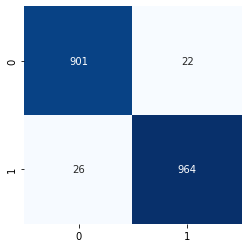

In [13]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score : ",accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred, target_names=['CANDIDATE', 'FALSE POSITIVE']), "\n")
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.show()

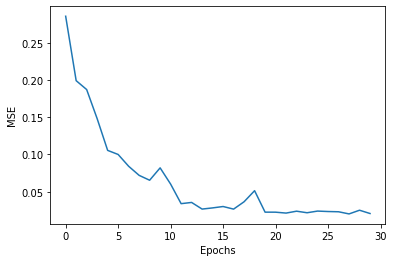

In [14]:
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(history.history['mse'])

In [16]:
ann.save('/content/drive/MyDrive/Major Project/Exoplanets/Model/MLP.h5')